In [1]:
import pandas as pd
import numpy as np

from pydataset import data
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from env import host, user, password
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr

In [2]:
#1
df_iris = data('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [3]:
# Print the first 3 rows

df_iris.iloc[0:3]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns(shape)

df_iris.shape

(150, 5)

In [5]:
# print the column names

df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# print the summary statistics for each of the numeric variables. 
# Would you recommend rescaling the data based on these statistics?
# No, no need to rescale the data, since the four variables are in the same scale. 

df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# 2
#df_excel = pd.read_excel('/Users/mms3-pro/codeup-data-science/Spreadsheets_Exercises.xlsx')
#df_excel.info()

In [8]:
df_excel_sample = df_excel.head(100)
df_excel_sample.info()

NameError: name 'df_excel' is not defined

In [ ]:
# print the numbers of rows of your original dataframe

df_excel.shape[0]

In [ ]:
# print first 5 column names

df_excel_sample.columns[0:5]

In [ ]:
# print the column names that have a data type of object

column_dtype = df_excel_sample.dtypes
column_dtype[column_dtype == 'object']

In [ ]:
# compute the range for each of the numeric varibales

a, b = df_excel.monthly_charges.agg(['min', 'max'])
print(f'The range of monthly charges is from {a} to {b}.')

c, d = df_excel.total_charges.agg(['min', 'max'])
print(f'The range of total charges is from {c} to {d}.')

In [9]:
# 3
G_sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = G_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# print first 3 rows

df_google.head(3)

In [ ]:
# print the number of rows and columns

df_google.shape

In [ ]:
# print column names

df_google.columns

In [ ]:
# print data type of each column

df_google.dtypes

In [ ]:
# print the summary statistics for each of the numeric variables

df_google.describe()

In [ ]:
# print the unique values for each of your categorical variables

df_google.nunique()

In [ ]:
print(f'The unique values for Sex: {df_google.Sex.unique()}')
print(f'The unique values for Survived: {df_google.Survived.unique()}')
print(f'The unique values for Pclass: {df_google.Pclass.unique()}')
print(f'The unique values for Embarked: {df_google.Embarked.unique()}')

In [10]:
# DATA PREPARATION
# 1A

import os

df_iris = data('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# 2 Drop the species_id and measurement_id columns.

df_iris.head()

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

#df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [16]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [ ]:
treatments = pd.read_csv('untidy-data/treatment.csv')

In [18]:
# 1

train_validate, test = train_test_split(df_iris, test_size=.2, 
                                        random_state=123,
                                        stratify=df_iris.Species
                                       )

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.Species
                                  )

In [19]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
80,5.7,2.6,3.5,1.0,versicolor
37,5.5,3.5,1.3,0.2,setosa
134,6.3,2.8,5.1,1.5,virginica
96,5.7,3.0,4.2,1.2,versicolor
19,5.7,3.8,1.7,0.3,setosa


In [20]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

<AxesSubplot:ylabel='Frequency'>

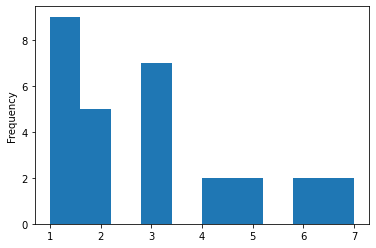

In [38]:
train['Sepal.Length'].value_counts().plot.hist()




<AxesSubplot:ylabel='Frequency'>

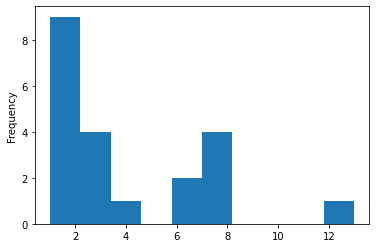

In [39]:
train['Sepal.Width'].value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

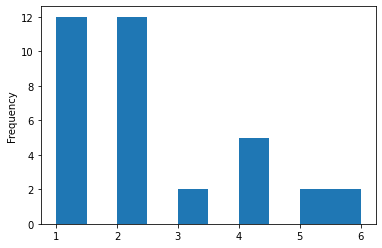

In [41]:
train['Petal.Length'].value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

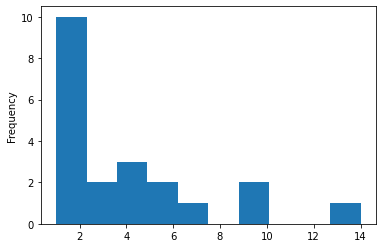

In [42]:
train['Petal.Width'].value_counts().plot.hist()

In [43]:
train.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
pd.crosstab(train.Species, train.Species, margins=True)

Species,setosa,versicolor,virginica,All
Species,,,,
setosa,28,0,0,28
versicolor,0,28,0,28
virginica,0,0,28,28
All,28,28,28,84


In [51]:
pd.crosstab(train['Petal.Length'].mean(), train.Species, margins=True)

Species,setosa,versicolor,virginica,All
row_0,,,,
3.7714285714285714,28,28,28,84
All,28,28,28,84
